<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3 - KNN classification Lab

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

# Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'

#  EDA 


Explore dataset. Clean data. Find correlation. 

In [3]:

bc = pd.read_csv('../DATA/breast-cancer-wisconsin-data.csv', header = 0)
bc.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130,77.58,135.1
area_mean,1001,1326,1203,386.1,1297
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [4]:
bc.drop(bc.columns[bc.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
bc.head().T


,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130,77.58,135.1
area_mean,1001,1326,1203,386.1,1297
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [5]:
bc.set_index('id', inplace=True)
bc.head().T

id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130,77.58,135.1
area_mean,1001,1326,1203,386.1,1297
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043
symmetry_mean,0.2419,0.1812,0.2069,0.2597,0.1809


In [6]:
#Create two separate dataframes for Benign and malignant results
bcb = bc[(bc['diagnosis'] == 'B')]
bcm = bc[(bc['diagnosis'] == 'M')]
missing_rows = ['concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se', 'concavity_worst', 'concave points_worst']

bcb[missing_rows].describe().T

,count,mean,std,min,25%,50%,75%,max
concavity_mean,357.0,0.046058,0.043442,0.0,0.020310,0.037090,0.05999,0.41080
concave points_mean,357.0,0.025717,0.015909,0.0,0.015020,0.023440,0.03251,0.08534
concavity_se,357.0,0.025997,0.032918,0.0,0.010990,0.018400,0.03056,0.39600
concave points_se,357.0,0.009858,0.005709,0.0,0.006433,0.009061,0.01187,0.05279
concavity_worst,357.0,0.166238,0.140368,0.0,0.077080,0.141200,0.22160,1.25200
concave points_worst,357.0,0.074444,0.035797,0.0,0.051040,0.074310,0.09749,0.17500


In [7]:
bcm[missing_rows].describe().T

,count,mean,std,min,25%,50%,75%,max
concavity_mean,212.0,0.160775,0.075019,0.023980,0.109525,0.151350,0.203050,0.4268
concave points_mean,212.0,0.087990,0.034374,0.020310,0.064620,0.086280,0.103175,0.2012
concavity_se,212.0,0.041824,0.021603,0.011010,0.026998,0.037125,0.050443,0.1438
concave points_se,212.0,0.015060,0.005517,0.005174,0.011415,0.014205,0.017497,0.0409
concavity_worst,212.0,0.450606,0.181507,0.023980,0.326425,0.404900,0.556175,1.1700
concave points_worst,212.0,0.182237,0.046308,0.028990,0.152750,0.182000,0.210675,0.2910


In [8]:
bc.groupby(['diagnosis'])[missing_rows].mean()

,concavity_mean,concave points_mean,concavity_se,concave points_se,concavity_worst,concave points_worst
diagnosis,,,,,,
B,0.046058,0.025717,0.025997,0.009858,0.166238,0.074444
M,0.160775,0.087990,0.041824,0.015060,0.450606,0.182237


In [9]:
bc.groupby(['diagnosis'])[missing_rows].median()

,concavity_mean,concave points_mean,concavity_se,concave points_se,concavity_worst,concave points_worst
diagnosis,,,,,,
B,0.03709,0.02344,0.018400,0.009061,0.1412,0.07431
M,0.15135,0.08628,0.037125,0.014205,0.4049,0.18200


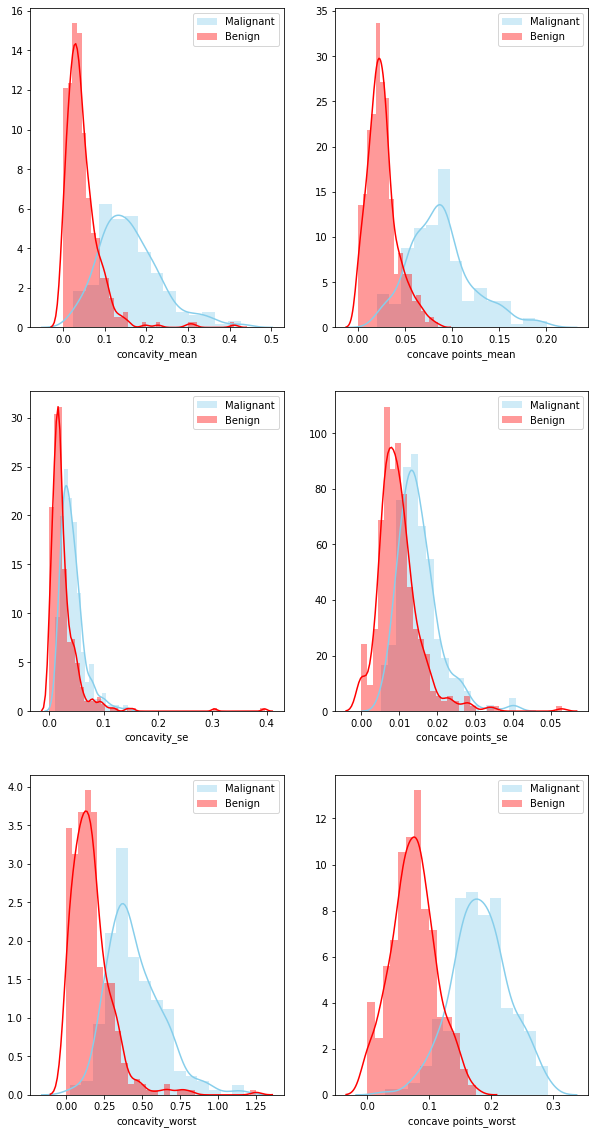

In [10]:
#Visualize the distribution of the missing metrics
plt.figure(figsize=(10,20))
plt.subplot(3,2,1)
sns.distplot( bcm['concavity_mean'] , color="skyblue", label="Malignant")
sns.distplot( bcb['concavity_mean'] , color="red", label="Benign")
plt.legend()
plt.subplot(3,2,2)
sns.distplot( bcm['concave points_mean'] , color="skyblue", label="Malignant")
sns.distplot( bcb['concave points_mean'] , color="red", label="Benign")
plt.legend()
plt.subplot(3,2,3)
sns.distplot( bcm['concavity_se'] , color="skyblue", label="Malignant")
sns.distplot( bcb['concavity_se'] , color="red", label="Benign")
plt.legend()
plt.subplot(3,2,4)
sns.distplot( bcm['concave points_se'] , color="skyblue", label="Malignant")
sns.distplot( bcb['concave points_se'] , color="red", label="Benign")
plt.legend()
plt.subplot(3,2,5)
sns.distplot( bcm['concavity_worst'] , color="skyblue", label="Malignant")
sns.distplot( bcb['concavity_worst'] , color="red", label="Benign")
plt.legend()
plt.subplot(3,2,6)
sns.distplot( bcm['concave points_worst'] , color="skyblue", label="Malignant")
sns.distplot( bcb['concave points_worst'] , color="red", label="Benign")
plt.legend()


In [11]:
#replace zero values with np.nan
bc[missing_rows] = bc[missing_rows].replace(0, np.nan)

In [12]:
bc.isnull().sum()

diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [13]:
bc['concavity_mean'].fillna(bc.groupby(['diagnosis'])['concavity_mean'].transform(np.median), inplace=True)
bc['concave points_mean'].fillna(bc.groupby(['diagnosis'])['concave points_mean'].transform(np.median), inplace=True)
bc['concavity_se'].fillna(bc.groupby(['diagnosis'])['concavity_se'].transform(np.median), inplace=True)
bc['concave points_se'].fillna(bc.groupby(['diagnosis'])['concave points_se'].transform(np.median), inplace=True)
bc['concavity_worst'].fillna(bc.groupby(['diagnosis'])['concavity_worst'].transform(np.median), inplace=True)
bc['concave points_worst'].fillna(bc.groupby(['diagnosis'])['concave points_worst'].transform(np.median), inplace=True)

In [14]:
bc.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
#Convert diagnosis results to numerical
bc['diagnosis'].replace({'B' : 0, 'M' : 1}, inplace = True)

# Set up the `diagnosis` variable as your target. How many classes are there?

ANSWER
- 2 Classes : Benign and Malignant

## What is the baseline accuracy?

In [19]:
# ANSWER
y.value_counts(normalize = True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

# Choose features to be your predictor variables and set up your X.

In [17]:
# ANSWER
#Target & Predictors
y = bc['diagnosis']
X = bc[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

# Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [18]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# fit on the unstandardized data:

KNeighborsClassifier(n_neighbors=1)

In [20]:
y_pred = knn.predict(X)

In [22]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [21]:
from sklearn import metrics

metrics.accuracy_score(y,y_pred)

1.0

## Evaluate the accuracy of your model.
- Is it better than baseline? : Yes
- Is it legitimate? : No. There was no train/test done, so the prediction is based on the entire population.

In [0]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values

# Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [0]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)

# STEP 2: train the model on the training set (using K=1)

# STEP 3: test the model on the testing set, and check the accuracy

# Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [0]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data

# Fit Train Data

# Print accuracy_score

# Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [0]:
# ANSWER
# plot test accuracy by number of neighbors:



# Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [0]:
# ANSWER

# Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [ ]:
# ANSWER
# Standarize X

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs =  ss.fit_transform(X)

In [2]:
# ANSWER
# plot test accuracy by number of neighbors:

test_acc_std = []
for i in range (1, int(max_neigbors)) :
    knn = KNeighborsClassifier(n_neighbors = i)
    test_acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

NameError: name 'max_neigbors' is not defined

In [4]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw = 3.)
ax.plot(list(range(1,int(max_neighbors))), test_acc_std, 1w=3., color='darkred')
plt.show()

SyntaxError: invalid syntax (<ipython-input-4-f30d140af0ec>, line 3)

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

© 2019 Institute of Data